In [1]:
import pandas as pd
import numpy as np
# df = pd.read_csv('csvs/data.csv')
# truth = df["S_squared"] == df["nev_S_squared"]
# df['S^2_match'] = False
# df.loc[truth,'S^2_match'] = True
# df = df[['lanth', 'spin', 'CASSCF', 'MCPDFT', 'nevpt', 'convergence','S^2_match']]
# for lanth in df['lanth']:
#     df[df['lanth'] == lanth].to_csv("csvs/{0}_energy.csv".format(lanth), index=False)

df = pd.read_csv('csvs/prod_data.csv')
df.columns = ['lanth', 'spin', 'CASSCF', 'MCPDFT', 'nevpt']
for lanth in df['lanth']:
    df.sort_values('spin', inplace=True)
    df[df['lanth'] == lanth].to_csv("csvs/{0}_energy.csv".format(lanth), index=False)

<>:99: SyntaxWarning: invalid escape sequence '\D'
<>:99: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1141/1670630574.py:99: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("$\Delta$E (eV)")


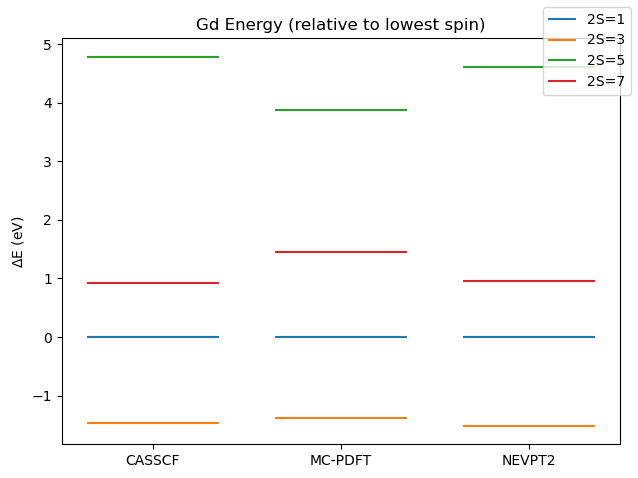

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import csv
def ladder_plot(data, labels=None, categories=None, zero_idx=None, scale:float=1, color=None, linestyles='solid', fig=None, ax=None):
    import numpy as np
    from collections.abc import Iterable
    
    data = np.atleast_2d(data)
    if labels is not None:
        labels = np.atleast_2d(labels)
        if np.size(labels,1) != np.size(data, 1):
            raise RuntimeError("'labels' must have the same length as each data row: {0} != {1}".format(len(labels), np.size(data,1)))
        if np.size(labels, 0) > 1 and labels.shape != data.shape:
            raise RuntimeError("if 'labels' is 2D it must have the same shape as data")
        if np.size(labels, 0) == 1:
            labels = np.array(list(labels) + [[None]*np.size(data,1)]*(np.size(data,0)-1))
    else:
        labels = [[None]*np.size(data,1)]*np.size(data,0)
    if categories is not None and len(categories) != np.size(data, 0):
        raise RuntimeError("'categories' must have the same length as the number of data columns: {0} != {1}".format(len(categories), np.size(data,0)))
    if zero_idx is not None:
        if isinstance(zero_idx, int):
            data = np.array([row-row[zero_idx] for row in data])
        elif isinstance(zero_idx, Iterable):
            data = np.array([row-row[i] for row, i in zip(data,zero_idx)])
        else:
            raise RuntimeError("'zero_idx' must be either an int or iterable of length equal to the number of data columns")
    if type(linestyles) is not str:
        if not isinstance(linestyles, Iterable):
            raise RuntimeError("Linestyles must either be a valid linestyle, or an array of valid line styles the same size as 'labels'")
    else:
        linestyles = [linestyles] * len(labels)   
    
    data = data*scale
    
    import matplotlib.pyplot as plt
    if color is None:
        color = plt.rcParams['axes.prop_cycle'].by_key()['color']
        color *= int(np.ceil(np.size(data) / len(color)))
    
    if fig is None and ax is None:
        fig, ax = plt.subplots(1, 1)
    elif fig is not None and ax is not None:
        pass
    else:
        raise RuntimeError("Must pass both fig and ax")
    
    width=0.7       
    bar_idx = np.arange(np.size(data,0))
    for bin, row, label_row in zip(bar_idx, data, labels):
        for entry, label, c, linestyle in zip(row, label_row, color, linestyles):
            ax.hlines(entry, xmin=bin, xmax=bin+width, label=label, color=c, linestyles=linestyle)
    ylim = ax.get_ylim()
    ax.bar(range(np.size(data,0)), [0] * np.size(data,0), align='edge', width=width)
    ax.set_xticks(bar_idx + width / 2, labels=[category.upper() for category in categories])    
    ax.set_ylim(ylim)
    
    return fig, ax
    

def plot_energy(filename, fig=None, ax=None):
    eH_to_eV = 27.2114
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        column_headers = next(reader)
        row = next(reader, None)
        csv_data = {k: [] for k in column_headers}
        while row is not None:
            for column, entry in zip(column_headers, row):
                csv_data[column] += [entry]
            row = next(reader, None)
        data = [[float(i) for i in csv_data['CASSCF']], [float(i) for i in csv_data['MCPDFT']], [float(i) for i in csv_data['nevpt']]]
        categories = ['CASSCF', 'MC-PDFT', 'NEVPT2']
        # print((np.array(data[1]) - data[1][-1])*eH_to_eV)
        labels = ["2S="+str(i) for i in csv_data['spin']]
        linestyles = ['solid'] * len(labels)

        # for match, converged in zip(csv_data['S^2_match'], csv_data['convergence']):
        #     if match == 'False' and (converged == 'NaN' or converged == '150'):
        #         linestyles += ['dashdot']
        #     elif match == 'False':
        #         linestyles += ['dashed']
        #     elif converged == 'NaN' or converged == '150':
        #         linestyles += ['dotted']
        #     else:
        #         linestyles += ['solid'] # Indent when commenting above
        fig, ax = ladder_plot(data, zero_idx=0, categories=categories, labels=labels, scale=eH_to_eV, linestyles=linestyles, fig=fig, ax=ax)

        fig.legend()
        fig.tight_layout()
        # ax.bar(range(np.size(data,1)), [0,0,0], align='edge', width=width)
        # ax.set_xticks(bar_idx + width / 2, labels=categories)    
        # ax.set_ylim(ylim)
    return fig, ax

lanth = 'Gd'

fig, ax = plot_energy('./csvs/{0}_energy.csv'.format(lanth))
ax.set_ylabel("$\Delta$E (eV)")
ax.set_title(lanth + " Energy (relative to lowest spin)")

width = 0.7
ylim = ax.get_ylim()

x1, x2= -.1, 2.7,   # subregion of the original image

y2=0.01
y1=-0.01
xpos, ypos = 0.5, 0.65

# axins = ax.inset_axes(
#     [xpos, ypos, 0.4, 0.2],
#     xlim=(x1, x2), ylim=(y1, y2))
# fig, axins = plot_energy('./csvs/{0}_energy.csv'.format(lanth), fig=fig, ax=axins)
# axins.set_ylabel("$\Delta$E (eV)")
# ax.indicate_inset_zoom(axins, edgecolor="black")


# y2=-5.835
# y1=-5.85
# xpos, ypos = 0.15, 0.25
# axins2 = ax.inset_axes(
#     [xpos, ypos, 0.3, 0.15],
#     xlim=(x1, x2), ylim=(y1, y2))
# fig, axins2 = plot_energy('./csvs/{0}_energy.csv'.format(lanth), fig=fig, ax=axins2)
# axins2.set_ylabel("$\Delta$E (eV)")
# ax.indicate_inset_zoom(axins2, edgecolor="black")


# y2=-6.65
# y1=-6.67
# xpos, ypos = 0.65, 0.15
# axins3 = ax.inset_axes(
#     [xpos, ypos, 0.3, 0.15],
#     xlim=(x1, x2), ylim=(y1, y2))
# fig, axins3 = plot_energy('./csvs/{0}_energy.csv'.format(lanth), fig=fig, ax=axins3)
# axins3.set_ylabel("$\Delta$E (eV)")
# ax.indicate_inset_zoom(axins3, edgecolor="black")

fig.tight_layout()

In [77]:
import pandas as pd
df = pd.read_csv('temp.csv')
truth = df["S_squared"] == df[" nev_S_squared"]
df['S^2_match'] = False
df.loc[truth, 'S^2_match'] = True
# df2[['lanth', 'spin', 'S_squared',' nev_S_squared']].reset_index().drop('index', axis=1)
df

,lanth,CASSCF,MCPDFT,convergence,S_squared,nev_lanth,nevpt,spin,nev_S_squared,S^2_match
0,Dy,-13051.017633,-384.318731,119,24.75,Dy,-13054.802675,9,24.750000,True
1,Dy,-13051.237865,-384.314489,13,15.75,Dy,-13055.022038,7,15.750000,True
2,Dy,-13051.406118,-384.260319,150,8.75,Dy,-13055.228987,5,8.750000,True
3,Dy,-13051.406279,-384.261089,36,3.75,Dy,-13055.229094,3,3.765450,False
4,Dy,-13051.406289,-384.260907,2,0.75,Dy,-13055.229211,1,0.771313,False
5,Er,-13979.979151,-398.921633,119,35.75,Er,-13983.810646,11,35.750000,True
6,Er,-13980.190719,-398.910478,24,24.75,Er,-13984.021997,9,24.750000,True
7,Er,-13980.449887,-398.916748,133,15.75,Er,-13984.285746,7,15.750000,True
8,Er,-13980.675521,-399.339615,150,8.75,Er,-13984.598355,5,8.750000,True
9,Er,-13980.675521,-399.339474,19,3.75,Er,-13984.598439,3,5.875984,False
